I will use the Netflix TV Shows and Movies dataset that provides information about various shows and movies in the streaming platform. The dataset includes details such as the title's name, its type (TV show or a movie), a brief description of the content, the year it was released, age certification rating, runtime (for TV shows: length of episodes; for movies: duration), IMDb score, and IMDb votes.
I intend to analyze the content for both tv shows and movies to obtain general information of the dataset and create ML models to predict the IMDB rating of new content.

https://www.kaggle.com/datasets/thedevastator/netflix-imdb-scores/
https://data.world/back2vizbasics


In [ ]:
import pandas as pd

netflix_data = pd.read_csv('netflix_data.csv')
print(netflix_data.head())


   index        id                            title   type  \
0      0   tm84618                      Taxi Driver  MOVIE   
1      1  tm127384  Monty Python and the Holy Grail  MOVIE   
2      2   tm70993                    Life of Brian  MOVIE   
3      3  tm190788                     The Exorcist  MOVIE   
4      4   ts22164     Monty Python's Flying Circus   SHOW   

                                         description  release_year  \
0  A mentally unstable Vietnam War veteran works ...          1976   
1  King Arthur, accompanied by his squire, recrui...          1975   
2  Brian Cohen is an average young Jewish man, bu...          1979   
3  12-year-old Regan MacNeil begins to adapt an e...          1973   
4  A British sketch comedy series with the shows ...          1969   

  age_certification  runtime    imdb_id  imdb_score  imdb_votes  
0                 R      113  tt0075314         8.3    795222.0  
1                PG       91  tt0071853         8.2    530877.0  
2       

In [39]:
netflix_data.info()
# data is clean

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5283 non-null   int64  
 1   id                 5283 non-null   object 
 2   title              5283 non-null   object 
 3   type               5283 non-null   object 
 4   description        5278 non-null   object 
 5   release_year       5283 non-null   int64  
 6   age_certification  2998 non-null   object 
 7   runtime            5283 non-null   int64  
 8   imdb_id            5283 non-null   object 
 9   imdb_score         5283 non-null   float64
 10  imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 454.1+ KB


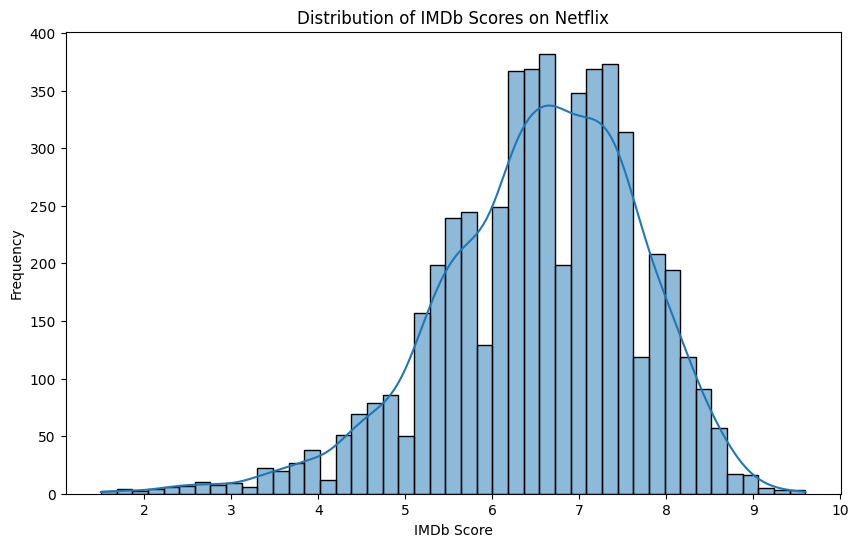

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of IMDb Scores
plt.figure(figsize=(10, 6))
sns.histplot(netflix_data['imdb_score'], kde=True)
plt.title('Distribution of IMDb Scores on Netflix')
plt.xlabel('IMDb Score')
plt.ylabel('Frequency')
plt.show()




The scores seem to follow a binomial distribution.

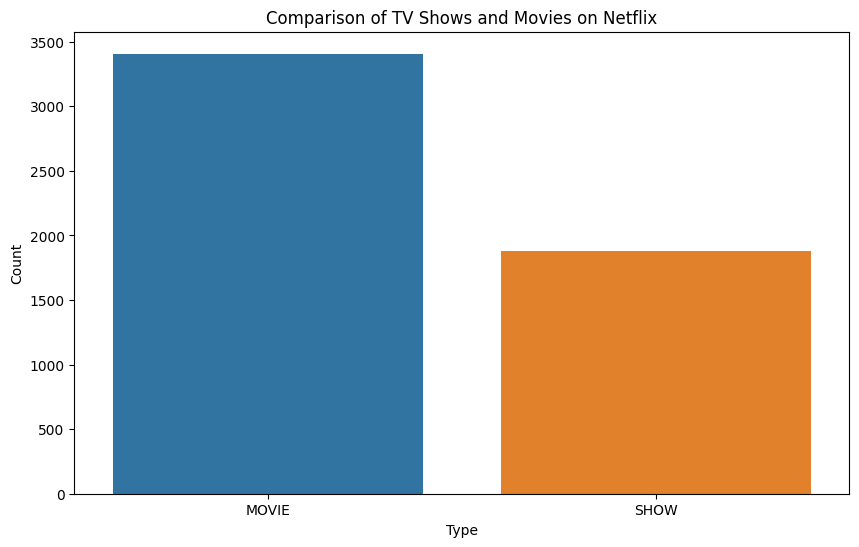

In [16]:
# Content Type Analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=netflix_data)
plt.title('Comparison of TV Shows and Movies on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

The amount of movies in the dataset is much larger than the amount of tv shows


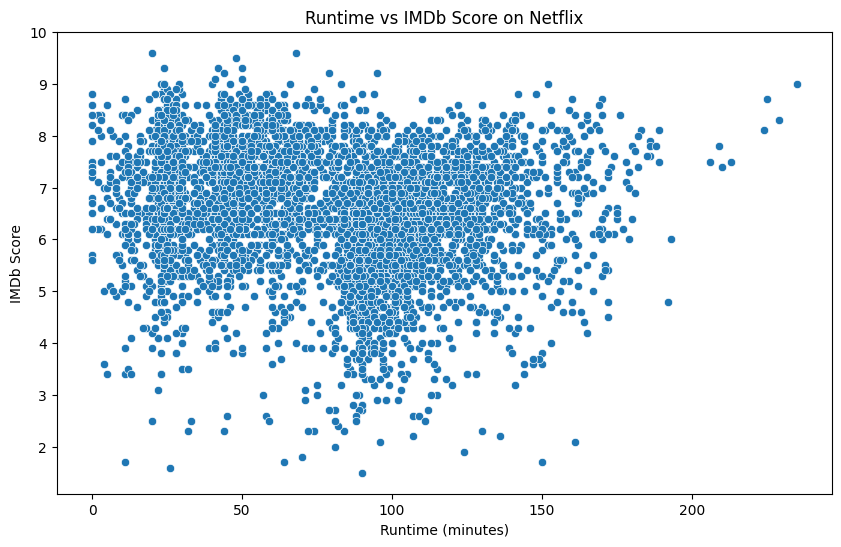

In [20]:
# Runtime Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='runtime', y='imdb_score', data=netflix_data)
plt.title('Runtime vs IMDb Score on Netflix')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Score')
plt.show()

There is no appearant correlation between runtime and rating to the naked eye


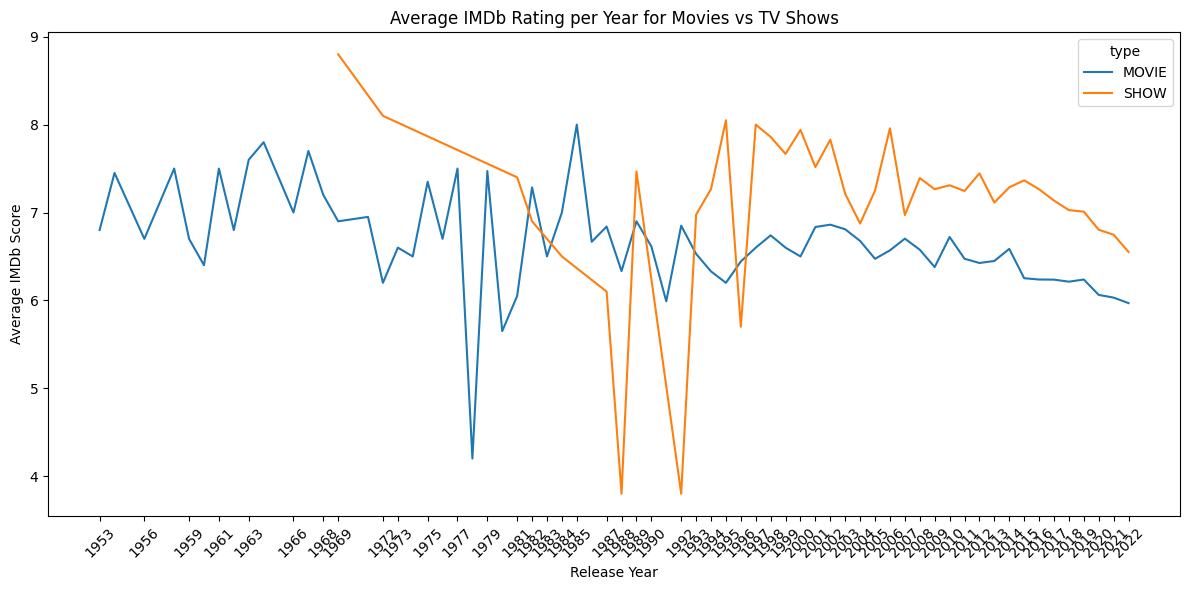

In [22]:
# Calculating average IMDb rating per year for movies and TV shows
yearly_avg_scores = netflix_data.groupby(['release_year', 'type'])['imdb_score'].mean().reset_index()

# Plotting the comparison
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_avg_scores, x='release_year', y='imdb_score', hue='type')
plt.title('Average IMDb Rating per Year for Movies vs TV Shows')
plt.xlabel('Release Year')
plt.ylabel('Average IMDb Score')
plt.xticks(yearly_avg_scores['release_year'][::2], rotation=45)
plt.tight_layout()
plt.show()


We can see that the average rating is not very stable through the years, yet there has been a stable decrease in rating starting around 2013 in both tv shows and movies. Furthermore, the average rating of tv shows has been higher than movies since the 90's


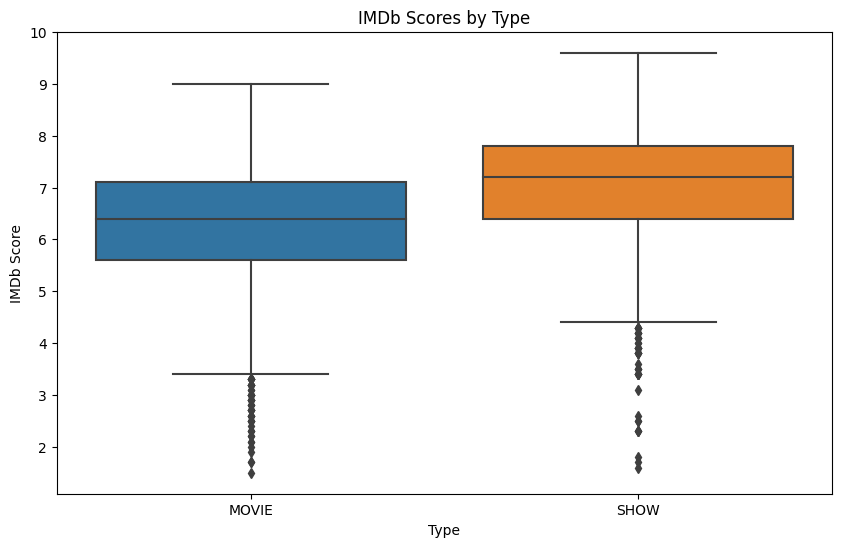

In [40]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='imdb_score', data=netflix_data)
plt.title('IMDb Scores by Type')
plt.xlabel('Type')
plt.ylabel('IMDb Score')
plt.show()


Visual comparison of IMDb scores between movies and TV shows with Seaborn


In [73]:
from sklearn.ensemble import RandomForestRegressor

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Training the model
rf_pipeline.fit(X_train, y_train)

# Model Evaluation
y_pred_rf = rf_pipeline.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Random Forest Mean Squared Error: {mse_rf}')


Random Forest Mean Squared Error: 1.4903049701433166


ML tree made with sklearn to predict rating based on type, release year,and runtime

In [75]:
# Get feature importances
feature_importances = rf_pipeline.named_steps['model'].feature_importances_

# Combine feature names with their importances
feature_names = numerical_cols + one_hot_feature_names.tolist()
features_and_importances = zip(feature_names, feature_importances)
sorted_features_and_importances = sorted(features_and_importances, key=lambda x: x[1], reverse=True)

# Display feature importances
for feature, importance in sorted_features_and_importances:
    print(f"{feature}: {importance}")


runtime: 0.5212452291053623
release_year: 0.33602968049480203
type_MOVIE: 0.09629486875373736
type_SHOW: 0.046430221646098335


Most important predictors in the model are runtime and year


In [81]:
new_data = {
    'type': ['TV Show'], 
    'release_year': [2020], 
    'runtime': [500] 
}

new_data_df = pd.DataFrame(new_data)

predicted_imdb_score = rf_pipeline.predict(new_data_df)
print("Predicted IMDb Score:", predicted_imdb_score[0])



Predicted IMDb Score: 8.089000000000002


In [49]:
import plotly.express as px

combined_data = netflix_data[['type', 'imdb_votes', 'imdb_score']]
combined_data.dropna(inplace=True)

fig = px.scatter(
    combined_data, x='imdb_votes', y='imdb_score', color='type',
    title='IMDb Votes vs. IMDb Score for Movies and TV Shows',
    labels={'imdb_votes': 'IMDb Votes', 'imdb_score': 'IMDb Score'},
    hover_data=['type']  
)

fig.show()


<ipython-input-49-0054125f65a1>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



IMDb Score vs Votes in an interactive plot using plotly



From the information obtain from the dataset, I have concluded that it seems that the the movies and tv shows with more votes tend to have higher rates. Furthermore, shows tend to score higher than movies. And both ratings for movies and tv shows have been in decline on average.